In [1]:
import os
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
_start = time.process_time()
def tic():
    global _start
    _start = time.process_time()

def toc():
    return time.process_time()-_start

# Files

In [3]:
enrollment_files = pickle.load(open("collected_enrollment_data.f","rb"))
free_spoken_files = pickle.load(open("free_speech_enrollment_data.f","rb"))
voice_commands_files = pickle.load(open("ubm_data.f","rb"))
collected_test_files = pickle.load(open("test_phrases.f","rb"))
noise_test_files = pickle.load(open("noisy_phrases.f","rb"))
imposter_test_files = pickle.load(open("imposter_phrases.f","rb"))

# Variables 

In [4]:
speakers = ["Speaker1","Speaker2","Speaker3","Speaker4","Speaker5","Speaker6","Speaker7","Speaker8","Speaker9"]
speakers_to_test = ["Speaker3","Speaker4","Speaker5","Speaker6","Speaker7","Speaker8","Speaker9"]

num_coef = [2,4,8,16,32,64,128]

# Train UBM

In [5]:
from ubm_model import UBM

In [6]:
UBMS = {}
for n in num_coef:
    ubm_model = UBM(num_coef = n)
    tic()
    ubm_model.loadtrainingfeatures(voice_commands_files)
    ubm_model.trainDigitUBM()
    print("Time taken to train model if size {}: {}".format(n,toc()))
    final_ubm = ubm_model.getUBM('d')
    pickle.dump(final_ubm,open("UBM_{}".format(n),"wb"))
    UBMS[n] = final_ubm


Time taken to train model if size 2: 138.359375
Time taken to train model if size 4: 136.34375
Time taken to train model if size 8: 193.640625
Time taken to train model if size 16: 332.734375
Time taken to train model if size 32: 710.328125
Time taken to train model if size 64: 1326.09375
Time taken to train model if size 128: 2686.484375


### Plot UBM Data

# Enroll speakers

In [7]:
import Speaker
from sys import getsizeof

In [ ]:
UBMS = {}
for n in num_coef:
    UBMS[n] = pickle.load(open("UBM_{}".format(n),"rb"))

In [8]:
all_speaker_models ={}
for n in num_coef:
    total_time=0
    final_ubm = UBMS[n]
    speaker_objects = {}
    for s in speakers:
        #new speaker
        tic()
        user = Speaker.speaker(name=s,num_features=13)
        user.enroll(final_ubm,enrollment_files[s])
        speaker_objects[s] = user
        timer = toc()
        print(user.getSizeOfModel())
#         print("Time taken to enroll speaker {} with ubm of size {}: {}".format(s,n,timer))
        total_time = total_time + timer
    print("Time for {}:{}".format(n,total_time/9))
    all_speaker_models[n] = speaker_objects

User Speaker1 enrolled
6240
User Speaker2 enrolled
6240
User Speaker3 enrolled
6240
User Speaker4 enrolled
6240
User Speaker5 enrolled
6240
User Speaker6 enrolled
6240
User Speaker7 enrolled
6240
User Speaker8 enrolled
6240
User Speaker9 enrolled
6240
Time for 2:4.185763888888889
User Speaker1 enrolled
12480
User Speaker2 enrolled
12480
User Speaker3 enrolled
12480
User Speaker4 enrolled
12480
User Speaker5 enrolled
12480
User Speaker6 enrolled
12480
User Speaker7 enrolled
12480
User Speaker8 enrolled
12480
User Speaker9 enrolled
12480
Time for 4:4.743055555555555
User Speaker1 enrolled
24960
User Speaker2 enrolled
24960
User Speaker3 enrolled
24960
User Speaker4 enrolled
24960
User Speaker5 enrolled
24960
User Speaker6 enrolled
24960
User Speaker7 enrolled
24960
User Speaker8 enrolled
24960
User Speaker9 enrolled
24960
Time for 8:5.925347222222222
User Speaker1 enrolled
49920
User Speaker2 enrolled
49920
User Speaker3 enrolled
49920
User Speaker4 enrolled
49920
User Speaker5 enrolled


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker5 enrolled
199680
User Speaker6 enrolled
199680


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker7 enrolled
199680
User Speaker8 enrolled
199680


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker9 enrolled
199680
Time for 64:23.192708333333332
User Speaker1 enrolled
399360
User Speaker2 enrolled
399360
User Speaker3 enrolled
399360
User Speaker4 enrolled
399360


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker5 enrolled
399360
User Speaker6 enrolled
399360


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker7 enrolled
399360
User Speaker8 enrolled
399360


F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User Speaker9 enrolled
399360
Time for 128:39.94444444444444


# Verify speakers

### FRR

In [9]:
frrscoresPerCoef ={}
for n in num_coef:
    final_ubm = UBMS[n]
    users = all_speaker_models[n]
    scores = {}
    for s in speakers:
        user = users[s]
        llrp = []        
        for f in collected_test_files[s]:
            recording = f
            temp = f.split("\\")[-1]
            prompt = temp.split("_")[0]
            llr = user.verify(recording,final_ubm,prompt,n)
                        
            llrp.append(llr)
        scores[s] =  np.array(llrp)
    frrscoresPerCoef[n] = scores

In [10]:
FRRperCoef = {}
TPRperCoef = {}
for n in num_coef:
    scores = frrscoresPerCoef[n]
    ffrs = []
    tprs= []

    thresholds = np.arange(-2000,2000,0.5)
    for t in range(len(thresholds)):
        FRR = []  
        TPR = []
        for s in speakers:        
            llr = frrscoresPerCoef[n][s]
            FRR.append(np.mean(llr<thresholds[t]))
            TPR.append(np.mean(llr>thresholds[t]))
            
        ffrs.append(np.mean(np.array(FRR)))
        tprs.append(np.mean(np.array(TPR)))
    FRRperCoef[n] = np.array(ffrs)
    TPRperCoef[n] = np.array(tprs)

### FAR

In [11]:
farscoresPerCoef ={}
for n in num_coef:
    final_ubm = UBMS[n]
    model_coef = all_speaker_models[n]
    scores = {}
    for t in speakers:
        user = model_coef[s]         
        llrp = []
        for s in speakers:            
            if t ==s :
                continue            
            for f in collected_test_files[s]:
                recording = f
                temp = f.split("\\")[-1]
                prompt = temp.split("_")[0]
                llr = user.verify(recording,final_ubm,prompt,n)

                llrp.append(llr)
        scores[t] =  np.array(llrp)
    farscoresPerCoef[n] = scores

In [12]:
FARperCoef = {} #false positive
for n in num_coef:
    scores =farscoresPerCoef[n]
    fars = []
    thresholds = np.arange(-2000,2000,0.5)
    for t in range(len(thresholds)):
        FAR = []
        for s in speakers:        
            llr = farscoresPerCoef[n][s] 
            FAR.append(np.mean(llr>thresholds[t]))
        fars.append(np.mean(np.array(FAR)))
    FARperCoef[n] = np.array(fars)

### DET

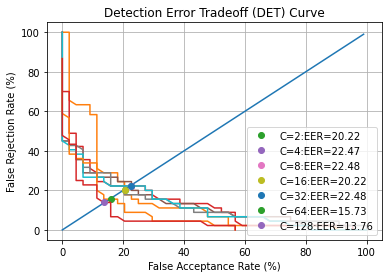

In [13]:
line = np.arange(0,100,1)
plt.plot(line)

for n in num_coef:
    
    x = FARperCoef[n]
    y = FRRperCoef[n]

    plt.plot(x*100,y*100)

    plt.xlabel('False Acceptance Rate (%)')
    plt.ylabel('False Rejection Rate (%)')
    plt.title('Detection Error Tradeoff (DET) Curve')
    
    eerthres =np.argmin(np.abs(x-y))
    eer = np.mean((x[eerthres],y[eerthres]))
    plt.plot(x[eerthres]*100,y[eerthres]*100,'o',label='C={}:EER={}'.format(n,round(eer*100,2)) )   
    
plt.legend(loc='lower right')
plt.grid()
plt.show()    

Text(0, 0.5, 'EER %')

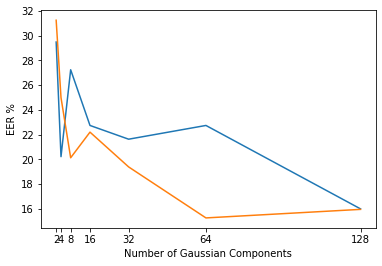

In [25]:
x = [2,4,8,16,32,64,128]
y = [29.49,20.23,27.25,22.75,21.64,22.75,16.01]

y1 = [31.25,25.0,20.14,22.21,19.4,15.28,15.97]

plt.plot(x,y)
plt.plot(x,y1)
plt.xticks(x,num_coef )
plt.xlabel("Number of Gaussian Components")
plt.ylabel("EER %")

20.224358974358974 -78.5


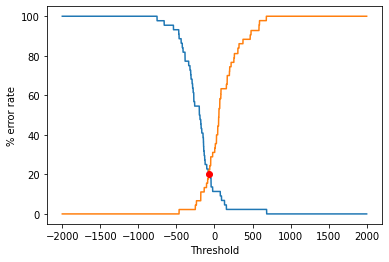

24.72222222222222 -311.0


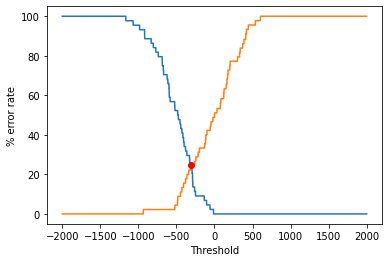

17.977207977207975 -365.0


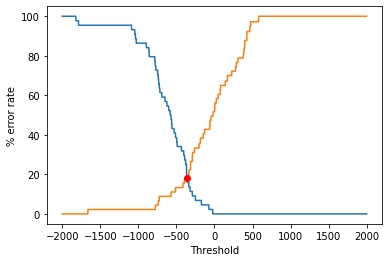

24.72222222222222 -325.0


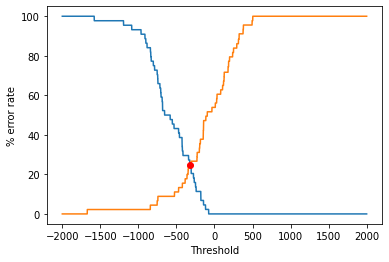

20.224358974358974 -226.5


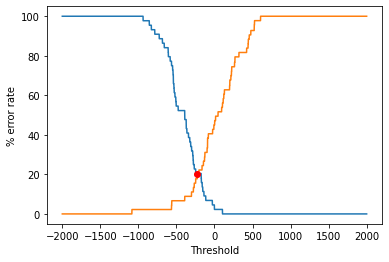

14.594017094017095 -105.0


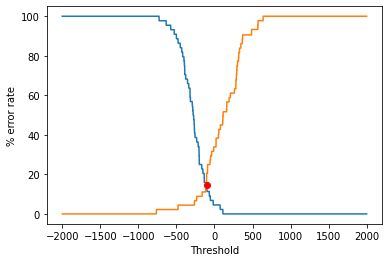

KeyError: 128

In [16]:
for n in num_coef:
    x = FARperCoef[n]
    y = FRRperCoef[n]
    eerthres =np.argmin(np.abs(x-y))
    eer = np.mean((x[eerthres],y[eerthres]))
    thresholds = np.arange(-2000,2000,0.5)
    print(eer*100,thresholds[eerthres])
    
    plt.plot(thresholds,x*100)
    plt.plot(thresholds,y*100)
    plt.plot(thresholds[eerthres],eer*100,'ro')
    plt.xlabel('Threshold')
    plt.ylabel('% error rate')
    plt.show()

### Set threshold per speaker

In [14]:
target_speakers = ["Speaker3","Speaker4","Speaker5","Speaker7","Speaker8","Speaker9"]
imposter_speakers = ["Speaker1","Speaker2","Speaker6"]
imposter_tests =['../data\\Speaker1\\phrases\\326807_Speaker1_s.wav','../data\\Speaker1\\phrases\\354688_Speaker1_s.wav','../data\\Speaker1\\phrases\\412235_Speaker1_s.wav','../data\\Speaker1\\phrases\\812500_Speaker1_s.wav','../data\\Speaker2\\phrases\\173488_Speaker2_s.wav','../data\\Speaker2\\phrases\\387038_Speaker2_s.wav','../data\\Speaker2\\phrases\\593777_Speaker2_s.wav','../data\\Speaker2\\phrases\\763236_Speaker2_s.wav','../data\\Speaker2\\phrases\\795010_Speaker2_s.wav','../data\\Speaker6\\phrases\\390105_Speaker6_s.wav','../data\\Speaker6\\phrases\\515294_Speaker6_s.wav','../data\\Speaker6\\phrases\\619203_Speaker6_s.wav','../data\\Speaker6\\phrases\\901741_Speaker6_s.wav','../data\\Speaker6\\phrases\\934241_Speaker6_s.wav','../data\\Speaker7\\phrases\\311244_Speaker7_s.wav','../data\\Speaker7\\phrases\\580986_Speaker7_s.wav','../data\\Speaker7\\phrases\\738476_Speaker7_s.wav','../data\\Speaker7\\phrases\\958195_Speaker7_s.wav','../data\\Speaker8\\phrases\\238434_Speaker8_s.wav','../data\\Speaker8\\phrases\\321995_Speaker8_s.wav','../data\\Speaker8\\phrases\\451741_Speaker8_s.wav','../data\\Speaker9\\phrases\\149061_Speaker9_s.wav','../data\\Speaker9\\phrases\\239088_Speaker9_s.wav','../data\\Speaker9\\phrases\\578232_Speaker9_s.wav','../data\\Speaker9\\phrases\\735776_Speaker9_s.wav','../data\\Speaker9\\phrases\\821102_Speaker9_s.wav']
random.shuffle(imposter_tests)

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


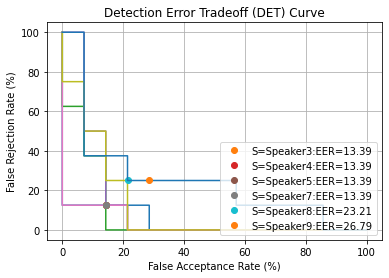

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


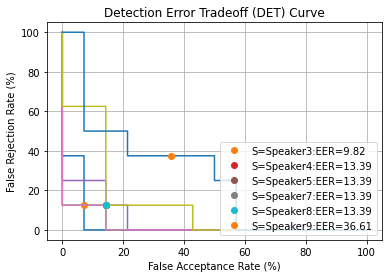

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


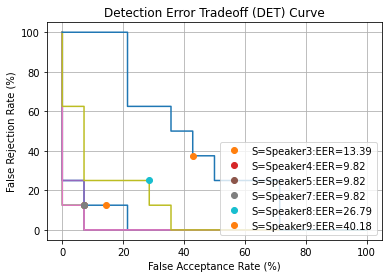

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


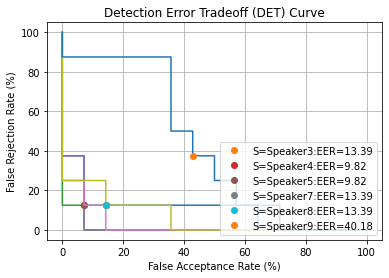

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


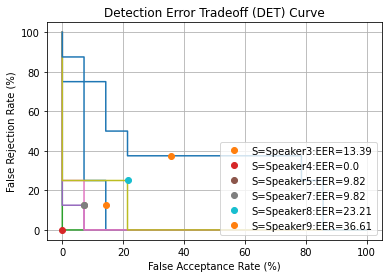

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


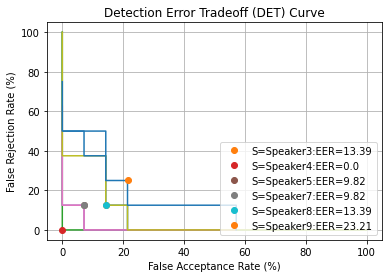

Speaker3 8
Speaker4 8
Speaker5 8
Speaker7 8
Speaker8 8
Speaker9 8


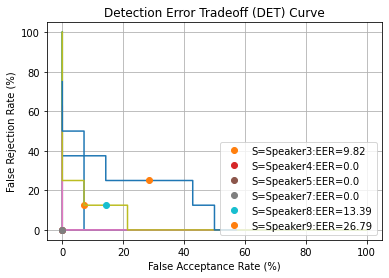

In [15]:

for coef in num_coef:
    final_ubm = UBMS[coef]
    model_coef = all_speaker_models[coef]

    for s in target_speakers:
        user = model_coef[s]
        llrpositive = []        
        for f in collected_test_files[s]:
            recording = f
            temp = f.split("\\")[-1]
            prompt = temp.split("_")[0]
            llr = user.verify(recording,final_ubm,prompt,coef)
            llrpositive.append(llr)
            
        for f in imposter_test_files[s]:
            recording = f
            temp = f.split("\\")[-1]
            prompt = temp.split("_")[0]
            llr = user.verify(recording,final_ubm,prompt,coef)
            llrpositive.append(llr)
            
       
        llrnegative = []    
        for imp in imposter_speakers:            
            if imp ==s :
                continue            
            for f in collected_test_files[imp]:
                recording = f
                temp = f.split("\\")[-1]
                prompt = temp.split("_")[0]
                llr = user.verify(recording,final_ubm,prompt,coef)
                llrnegative.append(llr)


        FAR=[]
        FRR=[]

        thresholds = np.arange(-2000,2000,0.5)
        for t in range(len(thresholds)):
            FAR.append(np.mean(llrnegative>thresholds[t]))
            FRR.append(np.mean(llrpositive<thresholds[t]))

        x = np.array(FAR)
        y = np.array(FRR)

        eerthres =np.argmin(np.abs(x-y))
        eer = np.mean((x[eerthres],y[eerthres]))

        user.threshold = thresholds[eerthres]
        print(s,thresholds[eerthres].itemsize*thresholds[eerthres].size)
        
        plt.plot(x*100,y*100)

        plt.xlabel('False Acceptance Rate (%)')
        plt.ylabel('False Rejection Rate (%)')
        plt.title('Detection Error Tradeoff (DET) Curve')
        plt.plot(x[eerthres]*100,y[eerthres]*100,'o',label='S={}:EER={}'.format(s,round(eer*100,2)) )   
    
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

### Test 

1. Actual speaker against correct phrases _(accepted: True positive,rejected: False Negative)_ 
3. Imposter speaker correct phrases _(accepted: False positive, rejected: True negative)_
2. Actual speaker wrong  phrases _(accepted: False positive  or rejected: True Negative)_
4. Imposter speaker wrong phrase _(accepted: False positive or rejected: True Negative)_ not concerned with a naive imposter

#correct phrase
for s in speakers:
    for each phrase is common phrases
        accepted = verify(s)
        append to speaker specific array
        for imp in speakers
            model = s
            phrase = imposter phrase
            verify
            apend
    
    
         

## Confusion Matrix

In [16]:
def plot_confusion_matrix(name,TP,FP,FN,TN):
    
    
    array = [[TP,FN],[FP,TN]]
    symbols = [["TP","FN"],["FP","TN"]]
    
    imposter =['Target','Imposter']
    accepted =['Accepted','Rejected']
    
    if type(name) is not str:
    
        fig, ax = plt.subplots()
        im = ax.imshow(array)

    #     negative_prediction = TN/(TN+FN)

        ax.set_xticks(np.arange(2))
        ax.set_yticks(np.arange(2))
        
        ax.set_xticklabels(accepted)
        ax.set_yticklabels(imposter)
        
        ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
        
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(symbols[i][j])+" = "+str(array[i][j]))

        fig.tight_layout()
#         plt.title('Target speaker:{}'.format(name))
        plt.show()
    
    total = np.sum(array)
    accuracy = (TP+TN)/total 
    error_rate = (FP+FN)/total
    recall  = TP/(TP+FN) if (TP+FN) != 0 else 0
    false_positive = FP/(TN+FP) if (TN+FP) != 0 else 0
    specificity = TN/(TN+FP) if (TN+FP) != 0 else 0
    precision = TP/(FP+TP) if (FP+TP) != 0 else 0
    f_measure = 2*(precision*recall)/(precision+recall) if (precision+recall) != 0 else 0
    
    if type(name) is str:
        name = name[-1]
    print('{} & {:0.4f} & {:0.4f} & {:0.4f} & {:0.4f} & {:0.4f} & {:0.4f} & {:0.4f} \\\\'.format(name,accuracy,error_rate,recall,false_positive,specificity,precision,f_measure))

## Correct phrase trials

In [17]:
import Validate



Coefficient 2
3 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
4 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
5 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
7 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
8 & 0.7727 & 0.2273 & 0.7500 & 0.2143 & 0.7857 & 0.6667 & 0.7059 \\
9 & 0.7273 & 0.2727 & 0.7500 & 0.2857 & 0.7143 & 0.6000 & 0.6667 \\


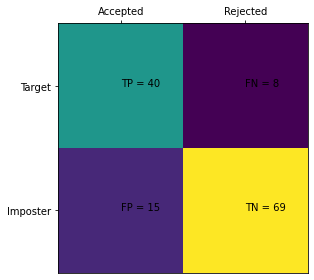

2 & 0.8258 & 0.1742 & 0.8333 & 0.1786 & 0.8214 & 0.7273 & 0.7767 \\


Coefficient 4
3 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
4 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
5 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
7 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
8 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
9 & 0.6364 & 0.3636 & 0.6250 & 0.3571 & 0.6429 & 0.5000 & 0.5556 \\


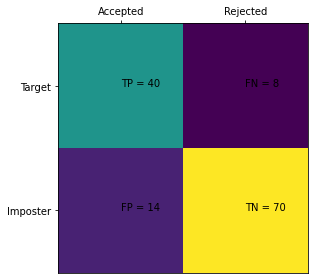

4 & 0.8333 & 0.1667 & 0.8333 & 0.1667 & 0.8333 & 0.7407 & 0.7843 \\


Coefficient 8
3 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
4 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
5 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
7 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
8 & 0.7273 & 0.2727 & 0.7500 & 0.2857 & 0.7143 & 0.6000 & 0.6667 \\
9 & 0.5909 & 0.4091 & 0.6250 & 0.4286 & 0.5714 & 0.4545 & 0.5263 \\


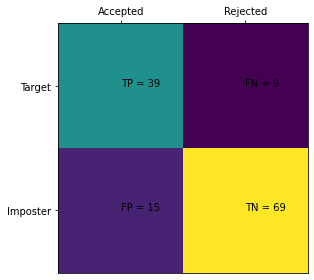

8 & 0.8182 & 0.1818 & 0.8125 & 0.1786 & 0.8214 & 0.7222 & 0.7647 \\


Coefficient 16
3 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
4 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
5 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
7 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
8 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
9 & 0.5909 & 0.4091 & 0.6250 & 0.4286 & 0.5714 & 0.4545 & 0.5263 \\


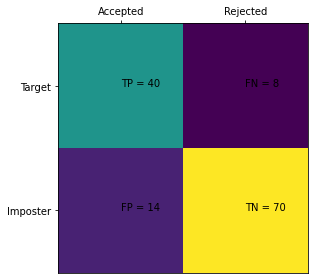

16 & 0.8333 & 0.1667 & 0.8333 & 0.1667 & 0.8333 & 0.7407 & 0.7843 \\


Coefficient 32
3 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
4 & 1.0000 & 0.0000 & 1.0000 & 0.0000 & 1.0000 & 1.0000 & 1.0000 \\
5 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
7 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
8 & 0.7727 & 0.2273 & 0.7500 & 0.2143 & 0.7857 & 0.6667 & 0.7059 \\
9 & 0.6364 & 0.3636 & 0.6250 & 0.3571 & 0.6429 & 0.5000 & 0.5556 \\


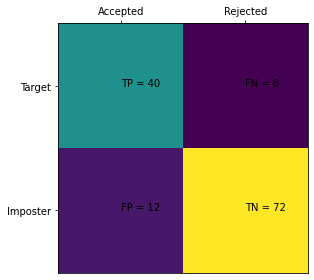

32 & 0.8485 & 0.1515 & 0.8333 & 0.1429 & 0.8571 & 0.7692 & 0.8000 \\


Coefficient 64
3 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
4 & 1.0000 & 0.0000 & 1.0000 & 0.0000 & 1.0000 & 1.0000 & 1.0000 \\
5 & 0.7727 & 0.2273 & 0.5000 & 0.0714 & 0.9286 & 0.8000 & 0.6154 \\
7 & 0.7273 & 0.2727 & 0.3750 & 0.0714 & 0.9286 & 0.7500 & 0.5000 \\
8 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
9 & 0.6818 & 0.3182 & 0.5000 & 0.2143 & 0.7857 & 0.5714 & 0.5333 \\


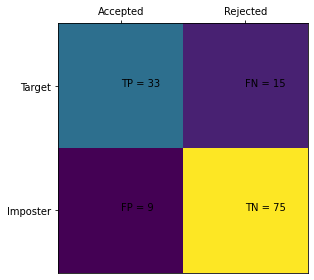

64 & 0.8182 & 0.1818 & 0.6875 & 0.1071 & 0.8929 & 0.7857 & 0.7333 \\


Coefficient 128
3 & 0.9091 & 0.0909 & 0.8750 & 0.0714 & 0.9286 & 0.8750 & 0.8750 \\
4 & 1.0000 & 0.0000 & 1.0000 & 0.0000 & 1.0000 & 1.0000 & 1.0000 \\
5 & 0.8636 & 0.1364 & 0.6250 & 0.0000 & 1.0000 & 1.0000 & 0.7692 \\
7 & 0.8182 & 0.1818 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667 \\
8 & 0.8636 & 0.1364 & 0.8750 & 0.1429 & 0.8571 & 0.7778 & 0.8235 \\
9 & 0.6364 & 0.3636 & 0.5000 & 0.2857 & 0.7143 & 0.5000 & 0.5000 \\


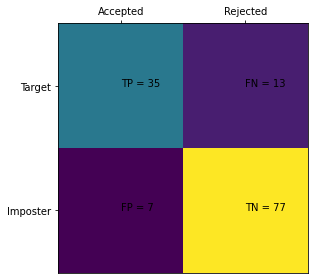

128 & 0.8485 & 0.1515 & 0.7292 & 0.0833 & 0.9167 & 0.8333 & 0.7778 \\


In [18]:
total_time = 0
for coef in num_coef:
    print('\n\nCoefficient',coef)
    final_ubm = UBMS[coef]
    model_coef = all_speaker_models[coef]
    total_tp = 0
    total_fn = 0
    total_fp = 0
    total_tn = 0
    timer = 0
    x=0
    for s in target_speakers:        

        user = model_coef[s]
        TP= 0
        FN= 0
        
#         print("\n\n target")
        for f in imposter_test_files[s]:
            recording = f
            temp = f.split("\\")[-1]
            prompt = temp.split("_")[0]
            
            tic()
            features = Validate.extract_features(recording, prompt, user.num_features)

            h0_hmm = Validate.generateHMM(user.speaker_model, prompt,coef)

            h1_hmm = Validate.generateHMM(final_ubm, prompt,coef)        
            
            llr = Validate.score(h0_hmm, h1_hmm, features)
            
            
            if llr > user.threshold:
                TP+=1
            else:
#                 print(f)
#                 print((h0_hmm.score(features)-h1_hmm.score(features)),user.threshold,llr-user.threshold)
                FN+=1
            timer+= toc()
            x+=1
        
        for f in collected_test_files[s]:
            recording = f
            temp = f.split("\\")[-1]
            prompt = temp.split("_")[0]
            tic()
            features = Validate.extract_features(recording, prompt, user.num_features)

            h0_hmm = Validate.generateHMM(user.speaker_model, prompt,coef)

            h1_hmm = Validate.generateHMM(final_ubm, prompt,coef)        
            
            llr = Validate.score(h0_hmm, h1_hmm, features)
        
    
            if llr > user.threshold:
                TP+=1
            else:
#                 print(f)
#                 print((h0_hmm.score(features)-h1_hmm.score(features)),user.threshold,llr-user.threshold)
                FN+=1              
            timer+=toc()
            x+=1
        FP= 0
        TN= 0
        
#         print("\n\n imposter")
                 
        for imp in imposter_speakers:        
            for f in collected_test_files[imp]:
                recording = f
                temp = f.split("\\")[-1]
                prompt = temp.split("_")[0]
                tic()
                features = Validate.extract_features(recording, prompt, user.num_features)

                h0_hmm = Validate.generateHMM(user.speaker_model, prompt,coef)

                h1_hmm = Validate.generateHMM(final_ubm, prompt,coef)  


                llr = Validate.score(h0_hmm, h1_hmm, features)   
                if llr > user.threshold:
#                     print(f)
#                     print((h0_hmm.score(features)-h1_hmm.score(features)),user.threshold,llr-user.threshold)
                    FP+=1               
                else:
                    TN+=1
                timer+=toc()
                x+=1
                

        total_tp += TP
        total_fn += FN
        total_fp += FP
        total_tn += TN
        plot_confusion_matrix(s,TP,FP,FN,TN)
#         print(user.threshold)
#     print("Time for {}:{}".format(coef,timer/x))
    plot_confusion_matrix(coef,total_tp,total_fp,total_fn,total_tn)


In [19]:
wrong_phrases= ['062415','753951','852147','879456','123654']

for wrong in wrong_phrases:
    print("\n",wrong,"\n")
    for coef in num_coef:
        final_ubm = UBMS[coef]
        model_coef = all_speaker_models[coef]
        speaker_accepted = 0
        speaker_rejected = 0
        imposter_accepted = 0
        imposter_rejected = 0
        for s in speakers_to_test:        

            user = model_coef[s]        
            for f in imposter_test_files[s]:
                recording = f
                prompt = wrong
                llr = user.verify(recording,final_ubm,prompt,coef)

                if llr > user.threshold:
                    speaker_accepted+=1
                else:
                    speaker_rejected+=1

            for f in collected_test_files[s]:
                recording = f
                prompt = wrong
                llr = user.verify(recording,final_ubm,prompt,coef)

                if llr > user.threshold:
                    speaker_accepted+=1
                else:
                    speaker_rejected+=1


            for f in imposter_tests:
                recording = f
                prompt = wrong
                llr = user.verify(recording,final_ubm,prompt,coef)   
                if llr > user.threshold:
                    imposter_accepted+=1
                else:
                    imposter_rejected+=1

        total_imposter = imposter_accepted+imposter_rejected
        total_speaker = speaker_accepted+speaker_rejected

        print("{} &  {:0.2f} &  {:0.2f} ".format(coef,100*speaker_accepted/total_speaker,100*imposter_accepted/total_imposter))





 062415 

2 &  57.14 &  21.98 
4 &  58.93 &  15.38 
8 &  35.71 &  13.74 
16 &  51.79 &  14.84 
32 &  39.29 &  10.99 
64 &  37.50 &  6.59 
128 &  37.50 &  6.59 

 753951 

2 &  58.93 &  21.43 
4 &  58.93 &  16.48 
8 &  39.29 &  12.64 
16 &  53.57 &  15.93 
32 &  55.36 &  20.33 
64 &  57.14 &  10.44 
128 &  66.07 &  13.19 

 852147 

2 &  75.00 &  21.98 
4 &  58.93 &  14.29 
8 &  57.14 &  22.53 
16 &  57.14 &  17.03 
32 &  57.14 &  16.48 
64 &  41.07 &  10.44 
128 &  48.21 &  9.89 

 879456 

2 &  66.07 &  21.43 
4 &  71.43 &  13.74 
8 &  62.50 &  17.58 
16 &  67.86 &  16.48 
32 &  58.93 &  17.03 
64 &  39.29 &  7.14 
128 &  41.07 &  8.24 

 123654 

2 &  82.14 &  26.92 
4 &  73.21 &  22.53 
8 &  66.07 &  18.68 
16 &  64.29 &  19.23 
32 &  67.86 &  16.48 
64 &  41.07 &  6.59 
128 &  42.86 &  10.44 


Text(0, 0.5, 'Time (s)')

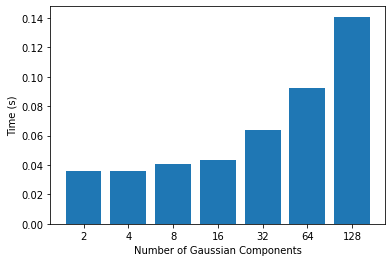

In [56]:
x = [0.03562973484848485,0.03598484848484849,0.04071969696969697,0.04344223484848485,0.06356534090909091,0.09256628787878787,0.14086174242424243]
y= np.arange(7)
plt.bar(y, x)
plt.xticks(y,num_coef )
plt.xlabel("Number of Gaussian Components")
plt.ylabel("Time (s)")

### Alternative data

In [8]:
free_spoken_files = {"george":[],"lucas":[],"jackson":[],"theo":[],"nicolas":[],"yweweler":[]}
free_train_files = {"george":[],"lucas":[],"jackson":[],"theo":[],"nicolas":[],"yweweler":[]}
free_test_files = {"george":[],"lucas":[],"jackson":[],"theo":[],"nicolas":[],"yweweler":[]}

other_speakers =["george","lucas","jackson","theo","nicolas","yweweler"]
speakers_to_test = ["lucas","jackson"]
digits = ['0','1','2','3','4','5','6','7','8','9']

free_digit = "../free-spoken-digit-dataset-master/recordings"
for d in digits:
    file = os.path.join(free_digit,d)
    recordings = os.listdir(file)
    i = 0
    
    for s in free_spoken_files:
        r = [(lambda x,y: os.path.join(x,y))(file,each) for each in  recordings[i:i+5]]
        free_spoken_files[s].append(r)       
        i+=50
    i = 0
    for s in free_spoken_files:
        r = [(lambda x,y: os.path.join(x,y))(file,each) for each in  recordings[i+5:i+15]]
        free_train_files[s].append(r)       
        i+=50
    i= 0
    for s in free_spoken_files:
        r = [(lambda x,y: os.path.join(x,y))(file,each) for each in  recordings[i+15:i+25]]
        free_test_files[s].append(r)       
        i+=50
    

In [9]:
alt_speaker_models ={}
for n in num_coef:
    final_ubm = UBMS[n]
    speaker_objects = {}
    for s in other_speakers:
        #new speaker
        tic()
        user = Speaker.speaker(name=s,num_features=13)
        user.enroll(final_ubm,free_spoken_files[s])
        speaker_objects[s] = user
        print("Time taken to enroll speaker {} with ubm of size {}: {}".format(s,n,toc()))
    alt_speaker_models[n] = speaker_objects

User george enrolled
Time taken to enroll speaker george with ubm of size 2: 0.734375
User lucas enrolled
Time taken to enroll speaker lucas with ubm of size 2: 0.8125
User jackson enrolled
Time taken to enroll speaker jackson with ubm of size 2: 0.75
User theo enrolled
Time taken to enroll speaker theo with ubm of size 2: 0.71875
User nicolas enrolled
Time taken to enroll speaker nicolas with ubm of size 2: 0.671875
User yweweler enrolled
Time taken to enroll speaker yweweler with ubm of size 2: 0.65625
User george enrolled
Time taken to enroll speaker george with ubm of size 4: 0.78125
User lucas enrolled
Time taken to enroll speaker lucas with ubm of size 4: 0.765625
User jackson enrolled
Time taken to enroll speaker jackson with ubm of size 4: 0.78125
User theo enrolled
Time taken to enroll speaker theo with ubm of size 4: 0.703125
User nicolas enrolled
Time taken to enroll speaker nicolas with ubm of size 4: 0.609375
User yweweler enrolled
Time taken to enroll speaker yweweler wit

F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  E[i] = (1/n_k[i])*temp
F:\UCT\UCT\4th Year\EEE4022S\src\dev\python\utils.py:84: RuntimeWarning: invalid value encountered in multiply
  E[i] = (1/n_k[i])*temp


User nicolas enrolled
Time taken to enroll speaker nicolas with ubm of size 128: 7.03125
User yweweler enrolled
Time taken to enroll speaker yweweler with ubm of size 128: 8.4375


Testing with other data

In [10]:
from scipy.io import wavfile
from random import randint

In [11]:
train_common_prompts = ['173488','387038','593777','050667','126014','716092','971239','475596','238434','321995','451714','580986']
test_command_prompts = ['364087','779416','595035','362198','947132','062415']

speaker_train_audio ={}
speaker_test_audio = {}
for s in other_speakers:
    utterance ={}
    for p in train_common_prompts:
        record = []
        for d in p:
            sampling_rate, audio_signal = wavfile.read(free_train_files[s][int(d)][randint(0, 9)])
#             print(audio_signal.dtype)
            record.append(audio_signal)
        utterance[p]= np.concatenate(np.array(record,dtype=object))
#         print(utterance[p].shape)
    speaker_train_audio[s] = utterance
    
    utterance ={}
    for p in test_command_prompts:
        record = []
        for d in p:
            sampling_rate, audio_signal = wavfile.read(free_test_files[s][int(d)][randint(0, 9)])
#             print(audio_signal.dtype)
            record.append(audio_signal)
        utterance[p]= np.concatenate(np.array(record,dtype=object))
#         print(utterance[p].shape)
    speaker_test_audio[s] = utterance

    
        



In [12]:
import Validate
import numpy as np
import features as mfcc

In [13]:
frrscoresPerCoef ={}
for n in num_coef:
    final_ubm = UBMS[n]
    users = alt_speaker_models[n]
    scores = {}
    for s in other_speakers:
        user = users[s]
        llrp = []        
        for u in speaker_train_audio[s]:
            recording = speaker_train_audio[s][u]
#             print(recording.dtype)
            
            feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                        mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)
            
            h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
            # genearate model for h1
            h1_hmm = Validate.generateHMM(final_ubm, u,n)

            # get score
            llr = Validate.score(h0_hmm, h1_hmm, feat)
                        
            llrp.append(llr)
        scores[s] =  np.array(llrp)
    frrscoresPerCoef[n] = scores

NameError: name 'alt_speaker_models' is not defined

In [14]:
FRRperCoef = {}
for n in num_coef:
    scores = frrscoresPerCoef[n]
    ffrs = []

    thresholds = np.arange(-1000,2000,5)
    for t in range(len(thresholds)):
        FRR = []        
        for s in other_speakers:        
            llr = frrscoresPerCoef[n][s]
            FRR.append(np.mean(llr<thresholds[t]))
                
        ffrs.append(np.mean(np.array(FRR)))
    FRRperCoef[n] = np.array(ffrs)

In [15]:
farscoresPerCoef ={}
for n in num_coef:
    final_ubm = UBMS[n]
    model_coef = alt_speaker_models[n]
    scores = {}
    for t in other_speakers:
        user = model_coef[s]         
        llrp = []
        for s in other_speakers:            
            if t ==s :
                continue            
            for u in speaker_train_audio[s]:
                recording = speaker_train_audio[s][u]
    #             print(recording.dtype)

                feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                            mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)

                h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
                # genearate model for h1
                h1_hmm = Validate.generateHMM(final_ubm, u,n)

                # get score
                llr = Validate.score(h0_hmm, h1_hmm, feat)

                llrp.append(llr)
        scores[t] =  np.array(llrp)
    farscoresPerCoef[n] = scores

In [16]:
FARperCoef = {} #false positive
for n in num_coef:
    scores =farscoresPerCoef[n]
    fars = []
    thresholds = np.arange(-1000,2000,5)
    for t in range(len(thresholds)):
        FAR = []
        for s in other_speakers:        
            llr = farscoresPerCoef[n][s] 
            FAR.append(np.mean(llr>thresholds[t]))
        fars.append(np.mean(np.array(FAR)))
    FARperCoef[n] = np.array(fars)

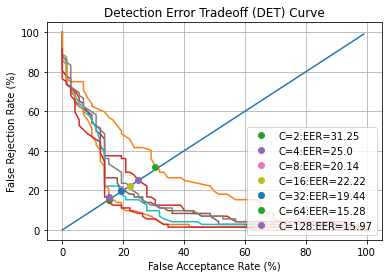

In [17]:
line = np.arange(0,100,1)
plt.plot(line)

for n in num_coef:
    
    x = FARperCoef[n]
    y = FRRperCoef[n]

    plt.plot(x*100,y*100)

    plt.xlabel('False Acceptance Rate (%)')
    plt.ylabel('False Rejection Rate (%)')
    plt.title('Detection Error Tradeoff (DET) Curve')
    
    eerthres =np.argmin(np.abs(x-y))
    eer = np.mean((x[eerthres],y[eerthres]))
    plt.plot(x[eerthres]*100,y[eerthres]*100,'o',label='C={}:EER={}'.format(n,round(eer*100,2)) )   
    
plt.legend(loc='lower right')
plt.grid()
plt.show()    

31.25 60


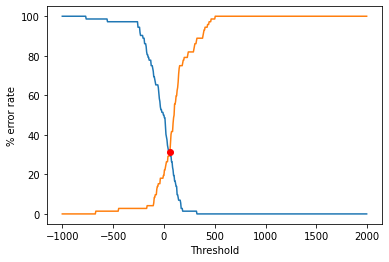

25.0 95


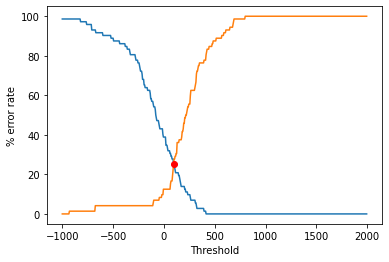

20.13888888888889 110


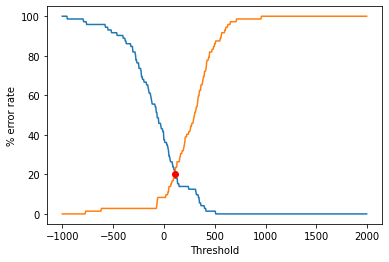

22.22222222222222 175


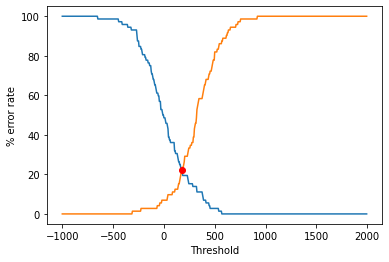

19.444444444444446 220


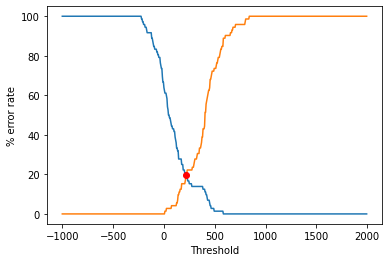

15.277777777777779 235


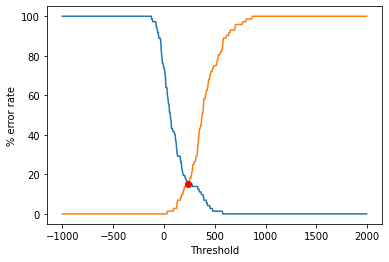

15.972222222222221 265


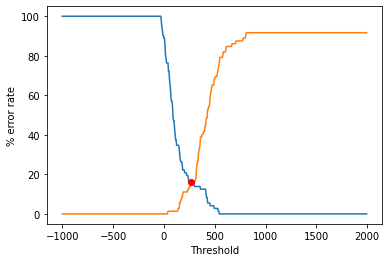

In [18]:
for n in num_coef:
    x = FARperCoef[n]
    y = FRRperCoef[n]
    eerthres =np.argmin(np.abs(x-y))
    eer = np.mean((x[eerthres],y[eerthres]))
    thresholds = np.arange(-1000,2000,5)
    print(eer*100,thresholds[eerthres])
    
    plt.plot(thresholds,x*100)
    plt.plot(thresholds,y*100)
    plt.plot(thresholds[eerthres],eer*100,'ro')
    plt.xlabel('Threshold')
    plt.ylabel('% error rate')
    plt.show()

In [27]:
for n in num_coef:
    final_ubm = UBMS[n]
    model_coef = alt_speaker_models[n]
    for s in other_speakers:
        user = model_coef[s]
        llrpositive = []        
        for u in speaker_train_audio[s]:
            recording = speaker_train_audio[s][u]
#             print(recording.dtype)
            
            feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                        mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)
            
            h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
            # genearate model for h1
            h1_hmm = Validate.generateHMM(final_ubm, u,n)
#             print(h0_hmm,h1_hmm)
            # get score
            llr = Validate.score(h0_hmm, h1_hmm, feat)
            llrpositive.append(llr)
#         print(n)
        llrnegative = []
        for t in other_speakers:            
            if t ==s :
                continue            
            for u in speaker_train_audio[t]:
                recording = speaker_train_audio[s][u]
    #             print(recording.dtype)

                feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                            mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)

                h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
                # genearate model for h1
                
                h1_hmm = Validate.generateHMM(final_ubm, u,n)
#                 print(h0_hmm.n_components,h0_hmm.n_mix,h1_hmm.n_components,h1_hmm.n_mix)
                # get score
                llr = Validate.score(h0_hmm, h1_hmm, feat)

                llrnegative.append(llr)

        FAR=[]
        FRR=[]

        thresholds = np.arange(-2000,2000,5)
        for t in range(len(thresholds)):
            FAR.append(np.mean(llrnegative>thresholds[t]))
            FRR.append(np.mean(llrpositive<thresholds[t]))

        x = np.array(FAR)
        y = np.array(FRR)

        eerthres =np.argmin(np.abs(x-y))
        eer = np.mean((x[eerthres],y[eerthres]))

        user.threshold = thresholds[eerthres]

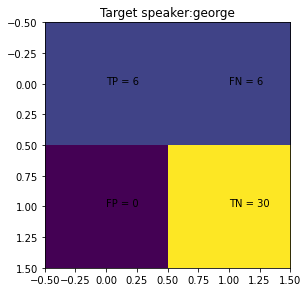

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


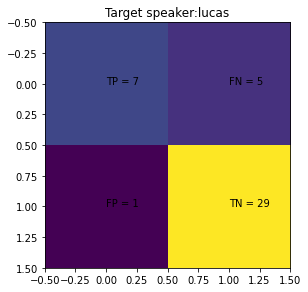

lucas & 0.8571 & 0.1429 & 0.5833 & 0.0333 & 0.9667 & 0.8750 & 0.7000


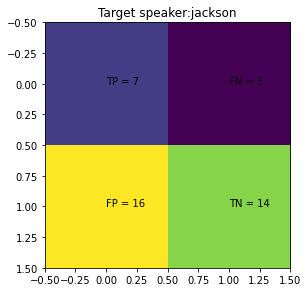

jackson & 0.5000 & 0.5000 & 0.5833 & 0.5333 & 0.4667 & 0.3043 & 0.4000


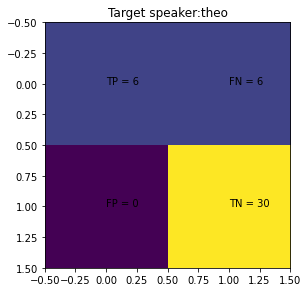

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


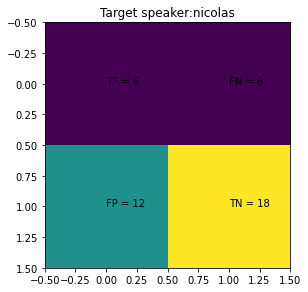

nicolas & 0.5714 & 0.4286 & 0.5000 & 0.4000 & 0.6000 & 0.3333 & 0.4000


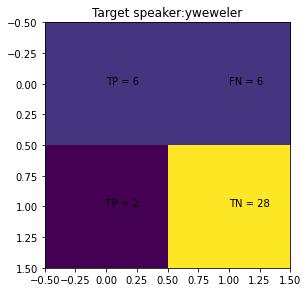

yweweler & 0.8095 & 0.1905 & 0.5000 & 0.0667 & 0.9333 & 0.7500 & 0.6000


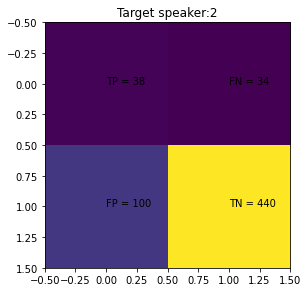

2 & 0.7810 & 0.2190 & 0.5278 & 0.1852 & 0.8148 & 0.2754 & 0.3619


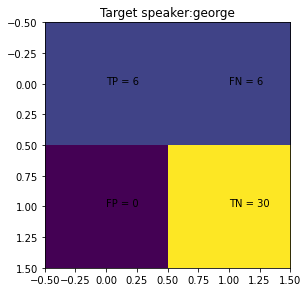

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


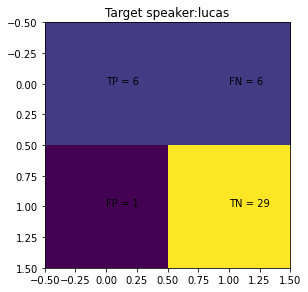

lucas & 0.8333 & 0.1667 & 0.5000 & 0.0333 & 0.9667 & 0.8571 & 0.6316


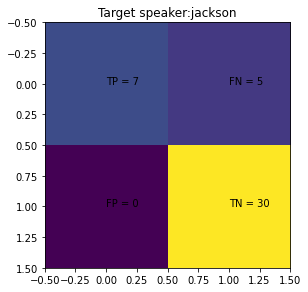

jackson & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


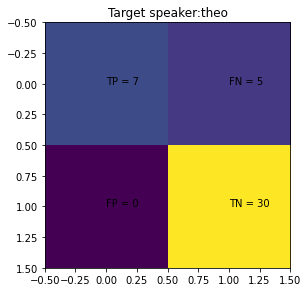

theo & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


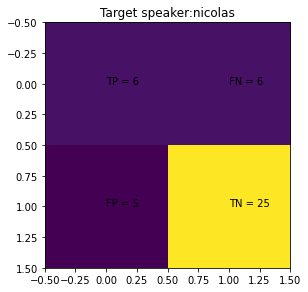

nicolas & 0.7381 & 0.2619 & 0.5000 & 0.1667 & 0.8333 & 0.5455 & 0.5217


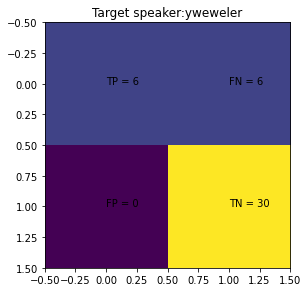

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


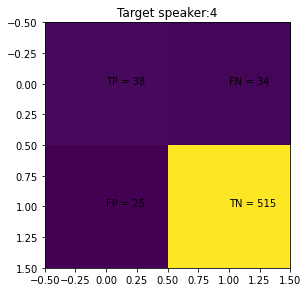

4 & 0.9036 & 0.0964 & 0.5278 & 0.0463 & 0.9537 & 0.6032 & 0.5630


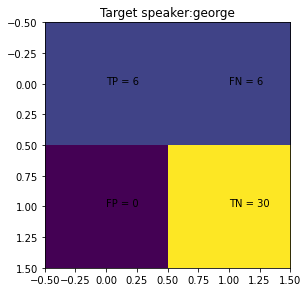

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


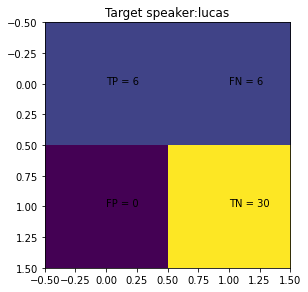

lucas & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


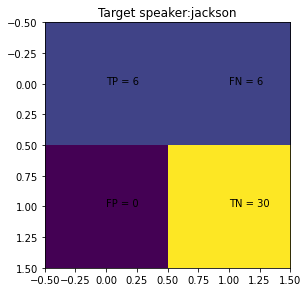

jackson & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


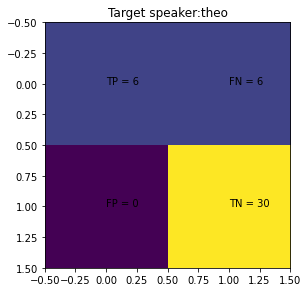

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


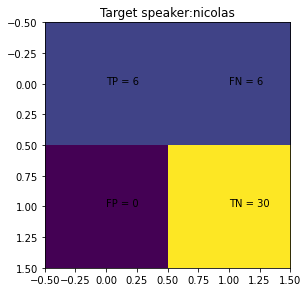

nicolas & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


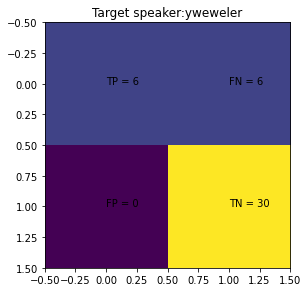

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


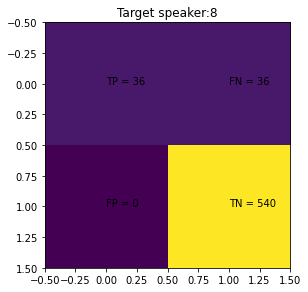

8 & 0.9412 & 0.0588 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


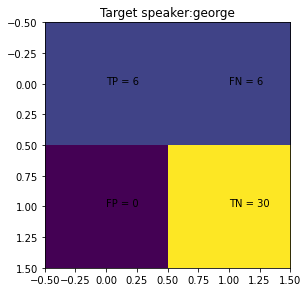

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


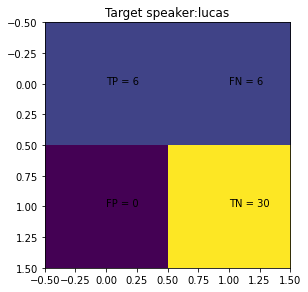

lucas & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


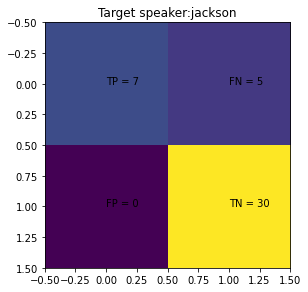

jackson & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


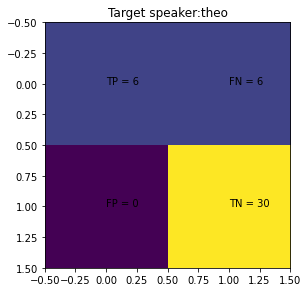

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


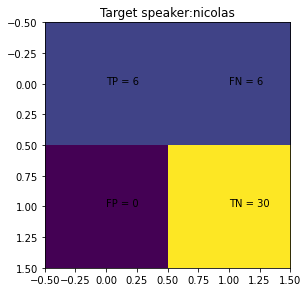

nicolas & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


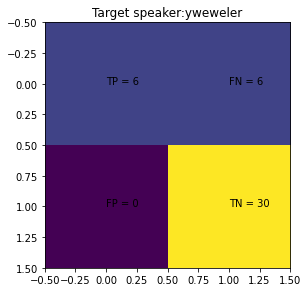

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


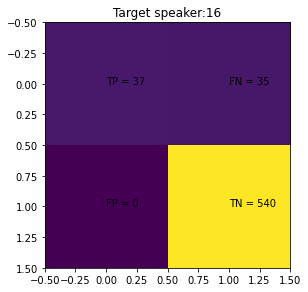

16 & 0.9428 & 0.0572 & 0.5139 & 0.0000 & 1.0000 & 1.0000 & 0.6789


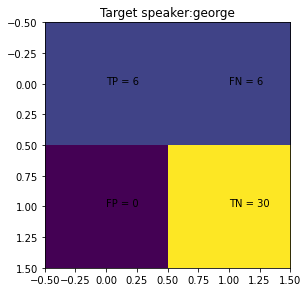

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


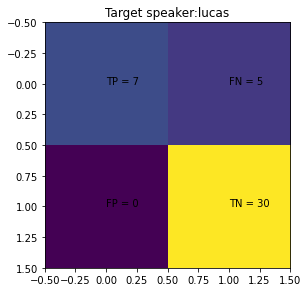

lucas & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


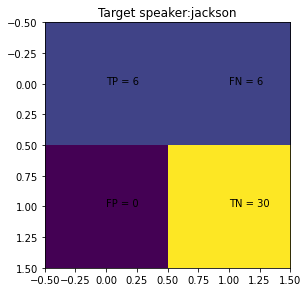

jackson & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


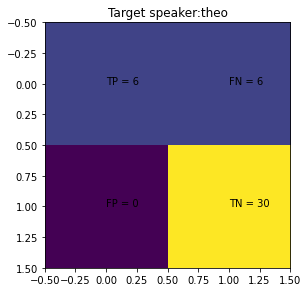

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


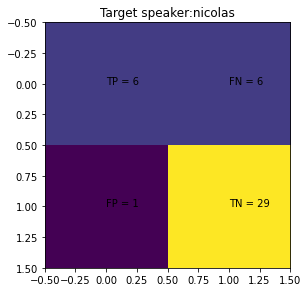

nicolas & 0.8333 & 0.1667 & 0.5000 & 0.0333 & 0.9667 & 0.8571 & 0.6316


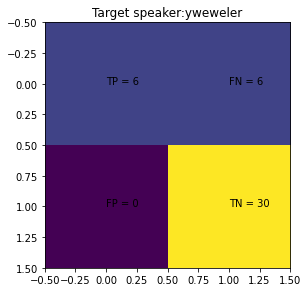

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


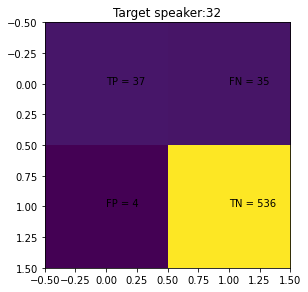

32 & 0.9363 & 0.0637 & 0.5139 & 0.0074 & 0.9926 & 0.9024 & 0.6549


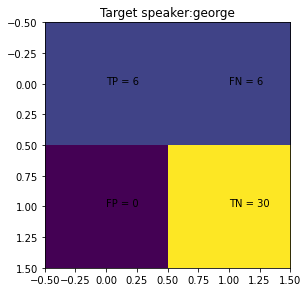

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


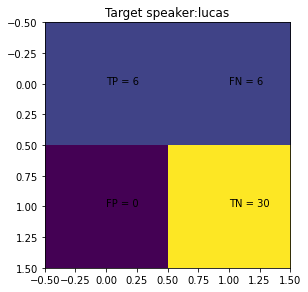

lucas & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


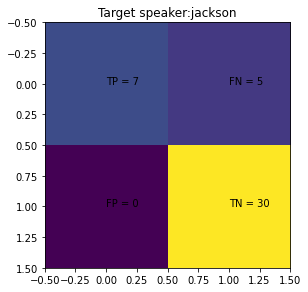

jackson & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


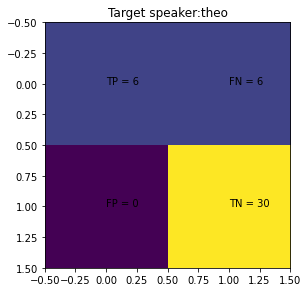

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


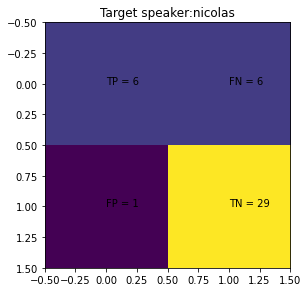

nicolas & 0.8333 & 0.1667 & 0.5000 & 0.0333 & 0.9667 & 0.8571 & 0.6316


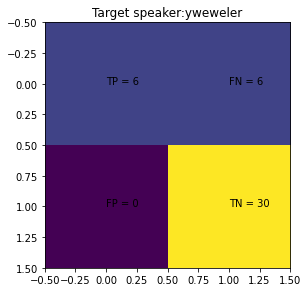

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


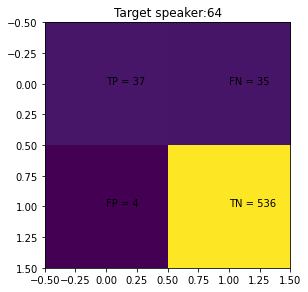

64 & 0.9363 & 0.0637 & 0.5139 & 0.0074 & 0.9926 & 0.9024 & 0.6549


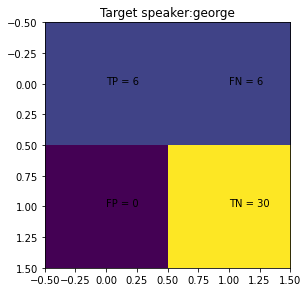

george & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


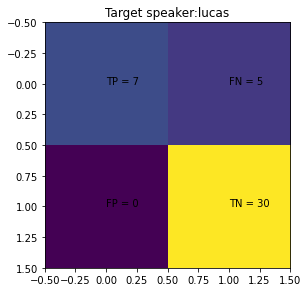

lucas & 0.8810 & 0.1190 & 0.5833 & 0.0000 & 1.0000 & 1.0000 & 0.7368


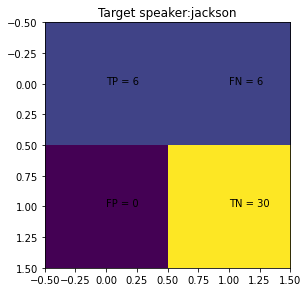

jackson & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


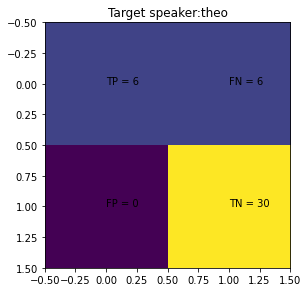

theo & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


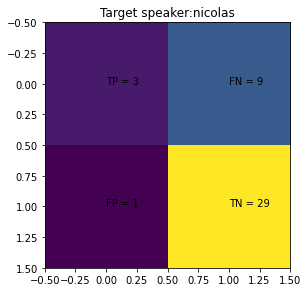

nicolas & 0.7619 & 0.2381 & 0.2500 & 0.0333 & 0.9667 & 0.7500 & 0.3750


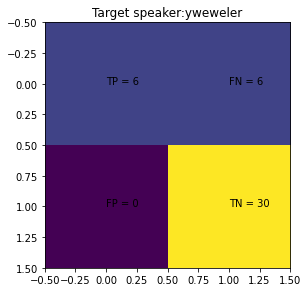

yweweler & 0.8571 & 0.1429 & 0.5000 & 0.0000 & 1.0000 & 1.0000 & 0.6667


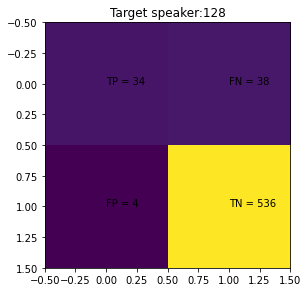

128 & 0.9314 & 0.0686 & 0.4722 & 0.0074 & 0.9926 & 0.8947 & 0.6182


In [29]:
thres = [60, 95,110,175,220,235,265]
i=0

for n in num_coef:
    final_ubm = UBMS[n]
    model_coef = alt_speaker_models[n]
    total_tp = 0
    total_fn = 0
    total_fp = 0
    total_tn = 0
    for s in other_speakers:
        user = model_coef[s]
        TP= 0
        FN= 0      
        for u in speaker_train_audio[s]:
            recording = speaker_train_audio[s][u]
#             print(recording.dtype)
            
            feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                        mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)
            
            h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
            # genearate model for h1
            h1_hmm = Validate.generateHMM(final_ubm, u,n)
#             print(h0_hmm,h1_hmm)
            # get score
            llr = Validate.score(h0_hmm, h1_hmm, feat)
        
            if llr >  user.threshold:
                TP+=1
            else:
                FN+=1
                
        total_tp += TP
        total_fn += FN

#         print(n)
        FP= 0
        TN= 0
        for t in other_speakers:            
            if t ==s :
                continue            
            for u in speaker_test_audio[t]:
                recording = speaker_test_audio[t][u]
    #             print(recording.dtype)

                feat = mfcc.getMFCC(recording, 8000, single_phrase=False,
                            mutliple_phrases=False, NUM_FEAT=13, ENERGY=True, Delta=False)

                h0_hmm = Validate.generateHMM(user.speaker_model, u,n)
                # genearate model for h1
                
                h1_hmm = Validate.generateHMM(final_ubm, u,n)
#                 print(h0_hmm.n_components,h0_hmm.n_mix,h1_hmm.n_components,h1_hmm.n_mix)
                # get score
                llr = Validate.score(h0_hmm, h1_hmm, feat)
                if llr >  user.threshold:
                    FP+=1
                else:
                    TN+=1
            total_fp +=FP
            total_tn +=TN
        plot_confusion_matrix(s,TP,FP,FN,TN)
    plot_confusion_matrix(n,total_tp,total_fp,total_fn,total_tn)
    i+=1

Text(0, 0.5, 'Time (s)')

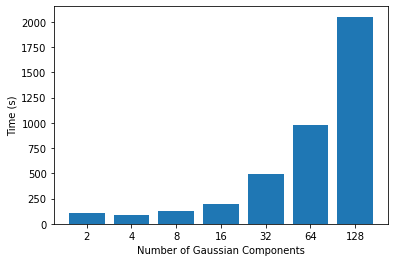

In [10]:

x = [102.80,87.98,123.3,200.91,496.39,973.55,2050.19]
y= np.arange(7)
plt.bar(y, x)
plt.xticks(y,num_coef )
plt.xlabel("Number of Gaussian Components")
plt.ylabel("Time (s)")

Text(0, 0.5, 'Time (s)')

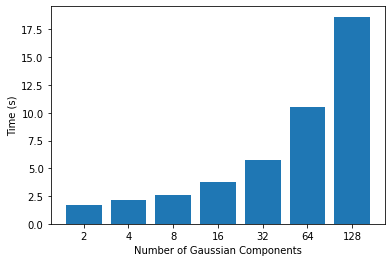

In [11]:
x = [ 1.71875,2.123263,2.611111,3.8003,5.75694,10.4756,18.649]
y= np.arange(7)
plt.bar(y, x)
plt.xticks(y,num_coef )
plt.xlabel("Number of Gaussian Components")
plt.ylabel("Time (s)")